# Credit Card Data Clustering

## Introduction

* Veri Kümesi, son 6 ayda yaklaşık 9000 aktif kredi kartı sahibinin kullanım davranışını özetlemektedir.
* Dosya, 18 davranış değişkeni ile müşteri düzeyindedir. 
* Pazarlama stratejisini tanımlamak için bir müşteri segmentasyonu geliştirmeyik için toplanmıştır.

## Analysis Conten (Analiz İçeriği)

1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Missing Value Analysis](#4)
5. [Data Visualization](#5)
    - [Histogram](#6)
    - [Box Plot](#7)
    - [Pair Plot](#8)
    - [Count Plot](#9)
    - [Dist Plot](#10)
    - [Sub Plot](#11)
    - [Heat Map](#12)
13. [Data Preparation](#13)
14. [K-Means Clustering](#14)
15. [PCA](#15)

<a id = "1"></a> <br>
## Python Libraries
- Kütüphaneleri içeri aktarıyoruz 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/ccdata/CC GENERAL.csv


<a id = "2"></a> <br>
## Data Content (Data İçeriği)

- **CUSTID :** Kredi Kartı Sahibi Kimliği (Kategorik)
- **BALANCE :** Alışveriş yapmak için hesaplarında kalan bakiye tutarı
- **BALANCEFREQUENCY :** Bakiyenin ne sıklıkta güncellendiği, 0 ile 1 arasında puan (1 = sık güncellenen, 0 = sık güncellenmeyen)
- **PURCHASES :** Hesaptan yapılan satın alma tutarı
- **ONEOFFPURCHASES :** Tek seferde yapılan maksimum satın alma tutarı
- **INSTALLMENTSPURCHASES :** Taksitli alışveriş tutarı
- **CASHADVANCE :** Kullanıcı tarafından verilen peşin nakit
- **PURCHASESFREQUENCY :** Satın Almaların ne sıklıkta yapıldığını, 0 ile 1 arasında puan verin (1 = sık satın alındı, 0 = sık satın alınmadı)
- **ONEOFFPURCHASESFREQUENCY :** Satın almaların tek seferde ne sıklıkta gerçekleştiği (1 = sık satın alınan, 0 = sık satın alınmayan)
- **PURCHASESINSTALLMENTSFREQUENCY :** Taksitli alışverişlerin ne sıklıkta yapıldığı (1=sık yapılıyor, 0=sık yapılmayacak)
- **CASHADVANCEFREQUENCY :** Peşin ödemenin ne sıklıkla yapıldığı
- **CASHADVANCETRX :** "Gelişmiş Nakit" ile Yapılan İşlem Sayısı
- **PURCHASESTRX :** Yapılan satın alma işlemi sayısı
- **CREDITLIMIT :** Kullanıcı için Kredi Kartı Limiti
- **PAYMENTS :** Kullanıcı tarafından yapılan ödeme tutarı
- **MINIMUM_PAYMENTS :** Kullanıcı tarafından yapılan minimum ödeme tutarı
- **PRCFULLPAYMENT :** Kullanıcı tarafından ödenen tam ödemenin yüzdesi
- **TENURE :** Kullanıcı için kredi kartı hizmetinin süresi

<a id = "3"></a> <br>
## Read and Analyse Data

* Datayı okuma ve analiz etme

In [2]:
#datayı df içerisne atarak okuyoruz
df = pd.read_csv('../input/ccdata/CC GENERAL.csv')
# yapılacak işlem zamnında orjinal datanın kaybolmaması için "data" kopyalıyourz
data = df.copy()
# sütunların isimleri büyük harf olduğu için küçük harfe dönüştürüyoruz
data.columns = data.columns.str.lower()

In [3]:
# ilk 5 satıra bakarak data içeriğini gözlemlemeye çalışıyoruz
data.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
# datanın uç noktalarını ve ayrıntılı özellikleri için describe uyguluyoruz
data.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
# satır ve sütun sayısına bakıyoruz
data.shape

(8950, 18)

In [6]:
# data hakkında sütun isimlerini ve içerik sayısına bakarak hangi türde veri olduğuna ve kabaca eksik veri var mı ona bakıyoruz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

<a id = "4"></a> <br>
## Missing Value Analysis

* Kayıp veri analizi

In [7]:
# null yani boş değer sorguluoruz (false = 0) ve topluyoruz bu şekilde kayıp veriyi tespit edebiliyoruz
data.isnull().sum().sort_values(ascending=False)
# minumum_payments verisinden 313 veri eksik olduğunu
# credit_limit değerinden 1 veri eksik olduğunu anlıyoruz

minimum_payments                    313
credit_limit                          1
cust_id                               0
balance                               0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
cash_advance_frequency                0
purchases_installments_frequency      0
oneoff_purchases_frequency            0
purchases_frequency                   0
cash_advance                          0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
tenure                                0
dtype: int64

In [8]:
# eksik olan verilerin yüzdesini hesaplayarak eksik olan verinin silinmesi durumunda ne kadar önem sahip olduğunu görebiliriz
(df.isnull().sum()/data['cust_id'].count())*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [9]:
data.dropna(inplace=True)

In [10]:
# Cust_ID, model oluşturma için ihtiyaç duymayacağımız bir sütundur, bu yüzden çıkarıyoruz
data.drop('cust_id', axis=1, inplace=True)

In [11]:
data.shape

(8636, 17)

<a id = "5"></a> <br>
## Data Visualization

In [12]:
o_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

<a id = "6"></a> <br>
### Histogram

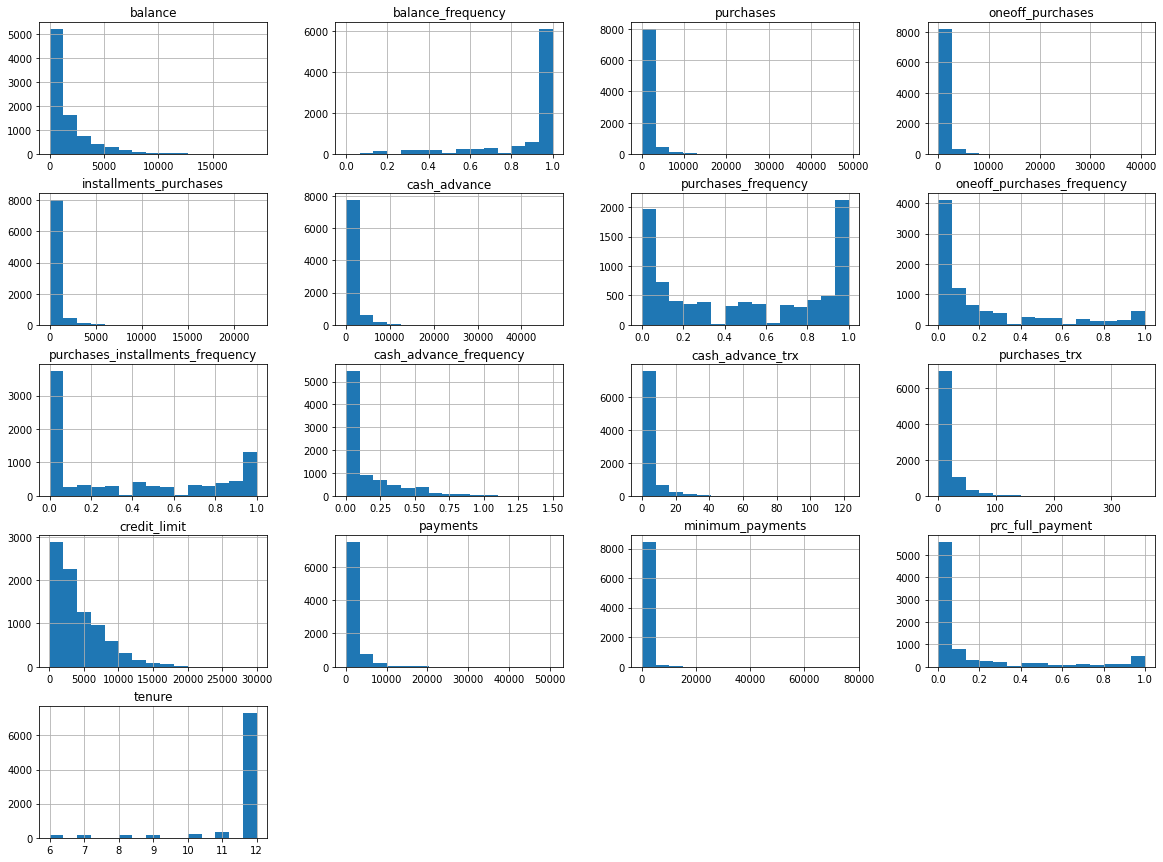

In [13]:
# her sütunun dağılımını göreselleştiriyoruz
data[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4));

### Burada aşağıdaki eğilimleri gözlemliyoruz:

1. Çoğu kredi kartı sahibinin kredi limiti düşüktür ve kredi bakiyesini 7500'ün altında tutar
2. Alımlar, OneOffPurchases, taksitli alımlar ve nakit avanslar gibi değişkenler de kredi bakiyesi ile aynı trendi takip etmektedir. Hepsi ilgili olabilir. Yani kredi bakiyesi düşük olduğu için alımlar da düşük.
3. Çoğu insan ya hiçbir şey satın almaz ya da çok sık satın alır.
4. Taksitle satın alan kişiler, tek seferde satın alanlara göre daha fazladır.
5. Son 6 ayda, çoğu kişi toplam ödemelerini 10.000'in altında, minimum ödemeleri de 5000'in altında yaptı.
6. Son olarak, kredi kartı sahiplerinin çoğu 12 aydan uzun bir süredir kart sahibidir.

### Bu eğilimlerin bazılarını iki değişkenli analizde daha fazla doğrulayabiliriz.

<a id = "7"></a> <br>
### Box Plot

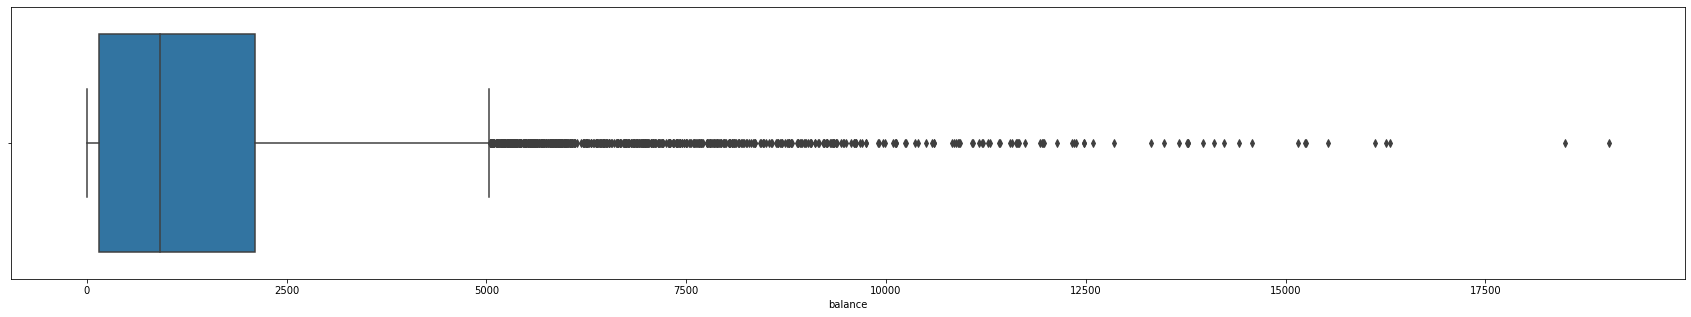

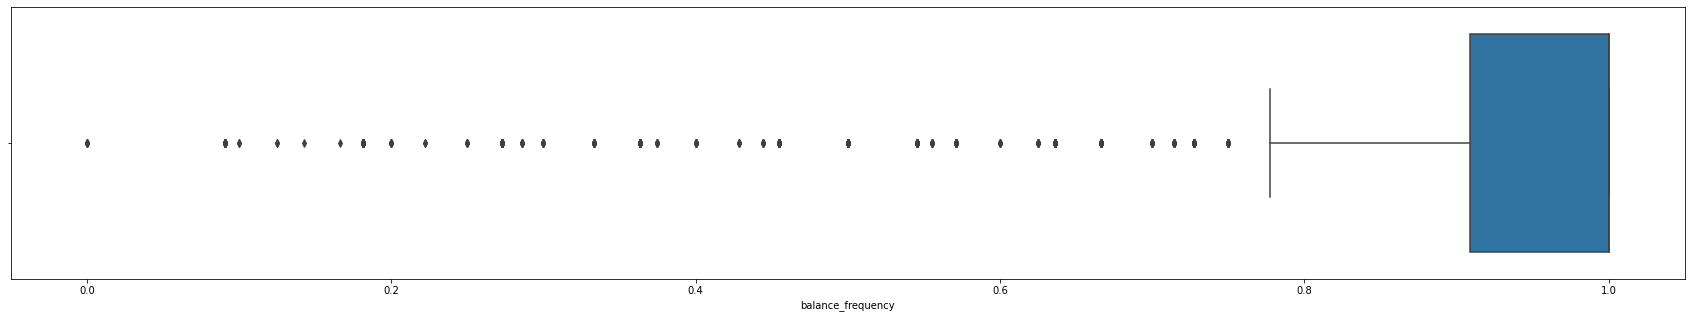

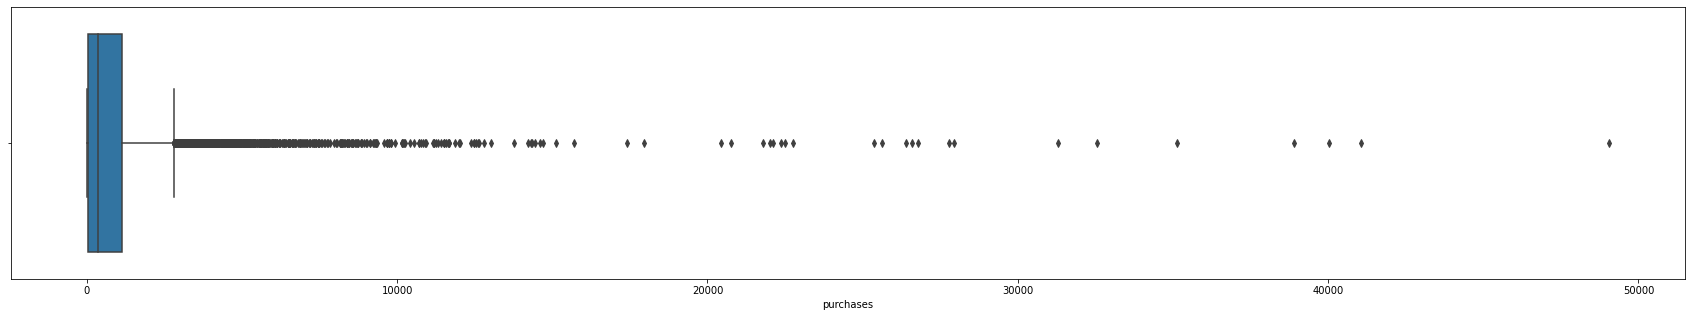

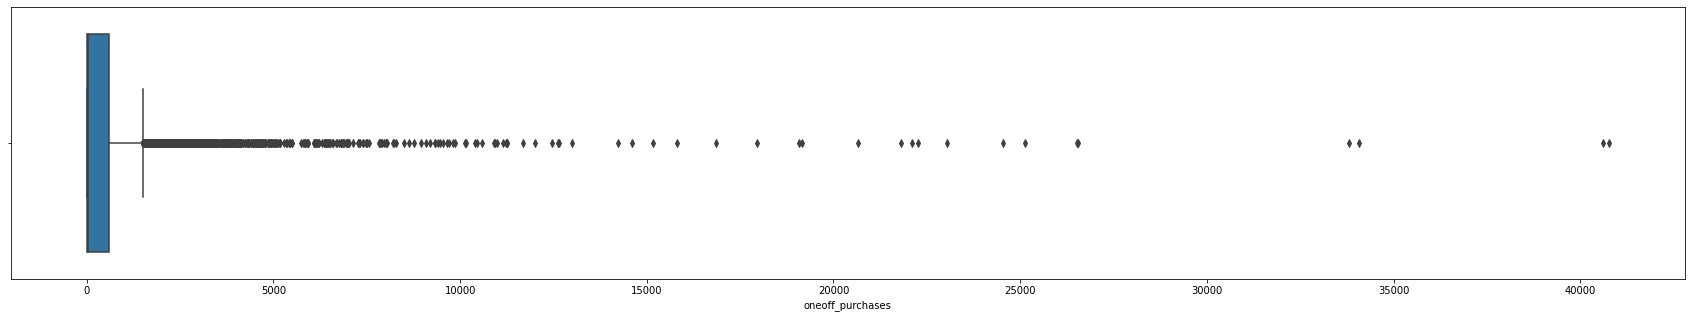

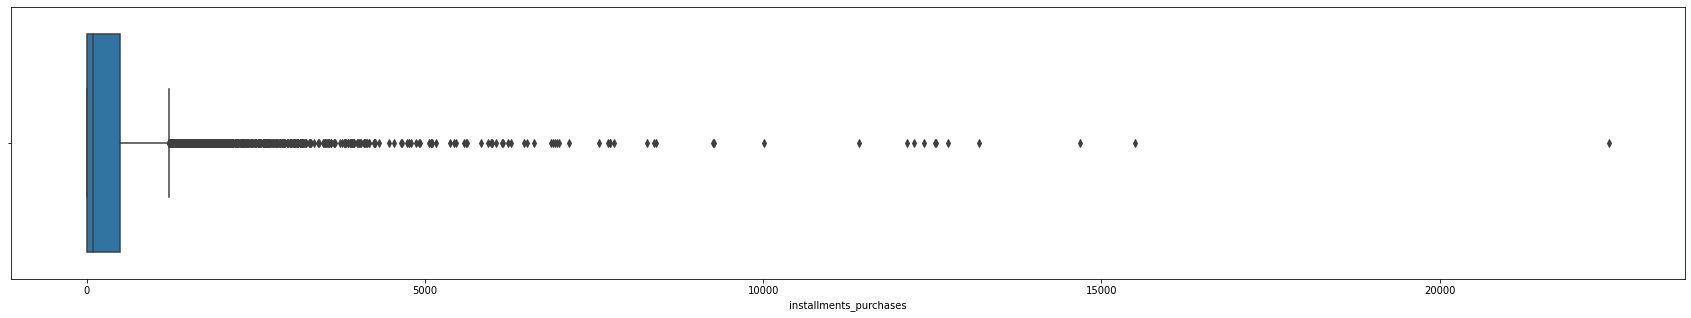

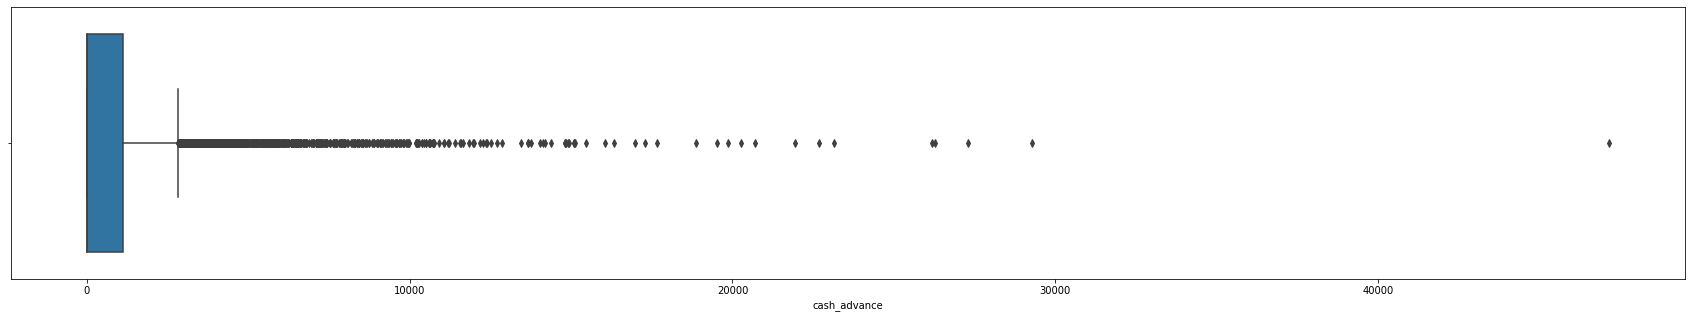

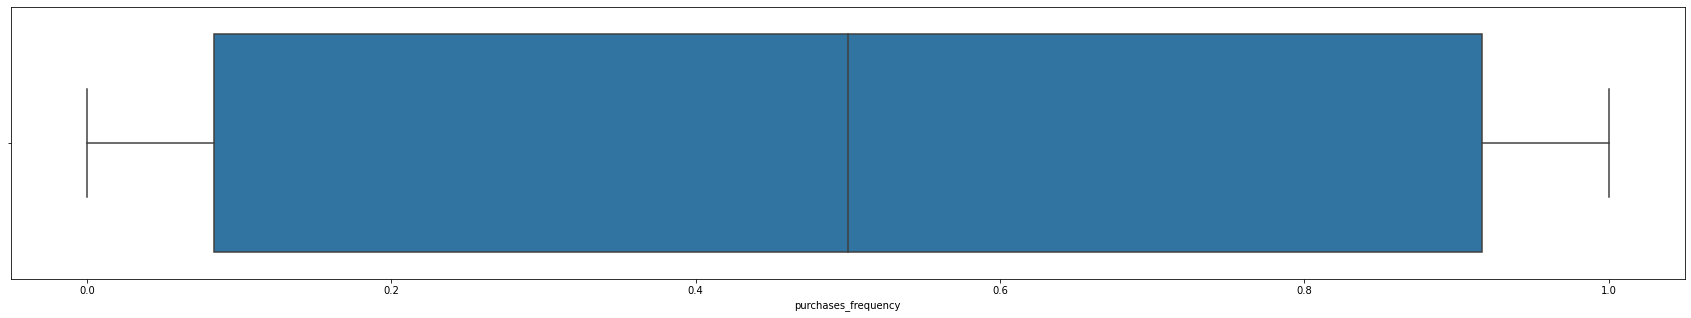

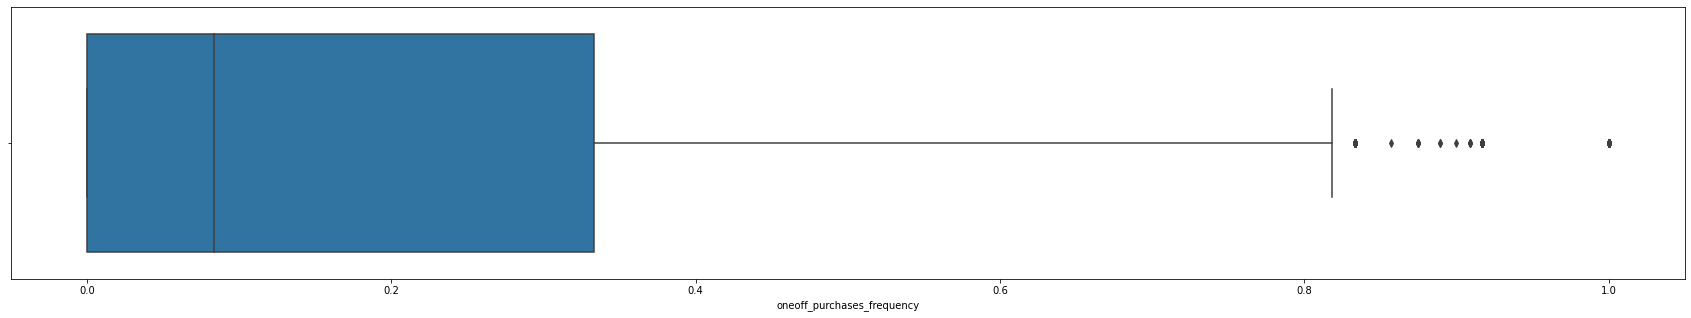

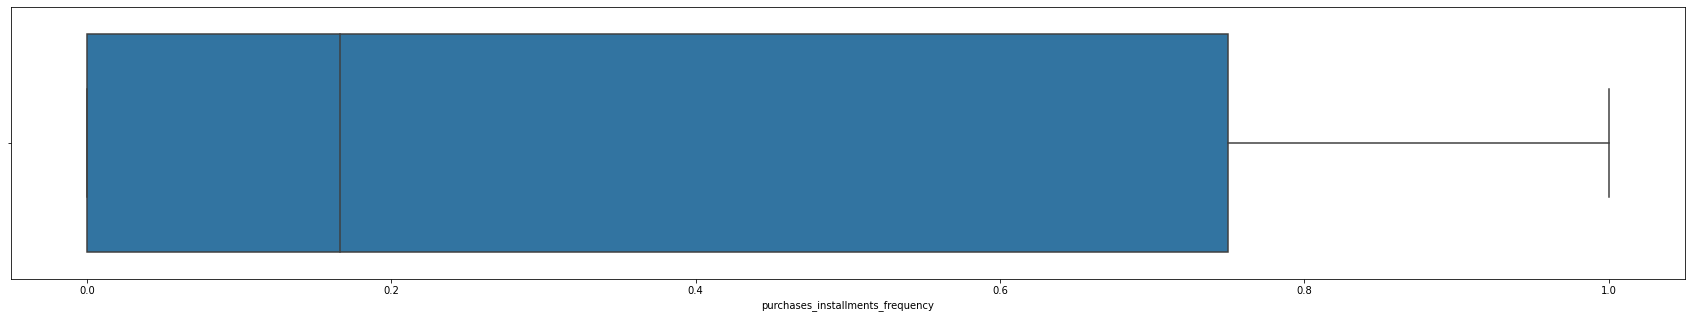

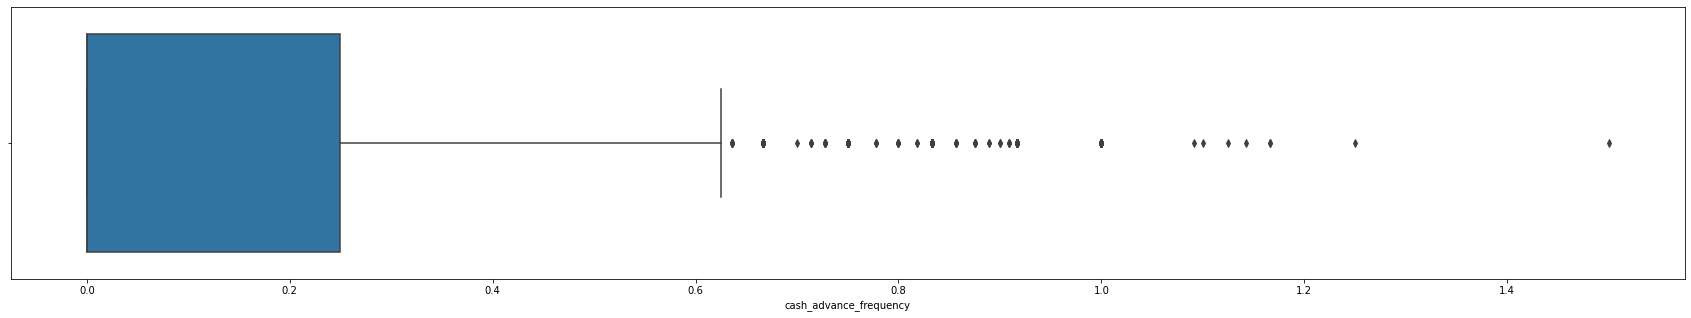

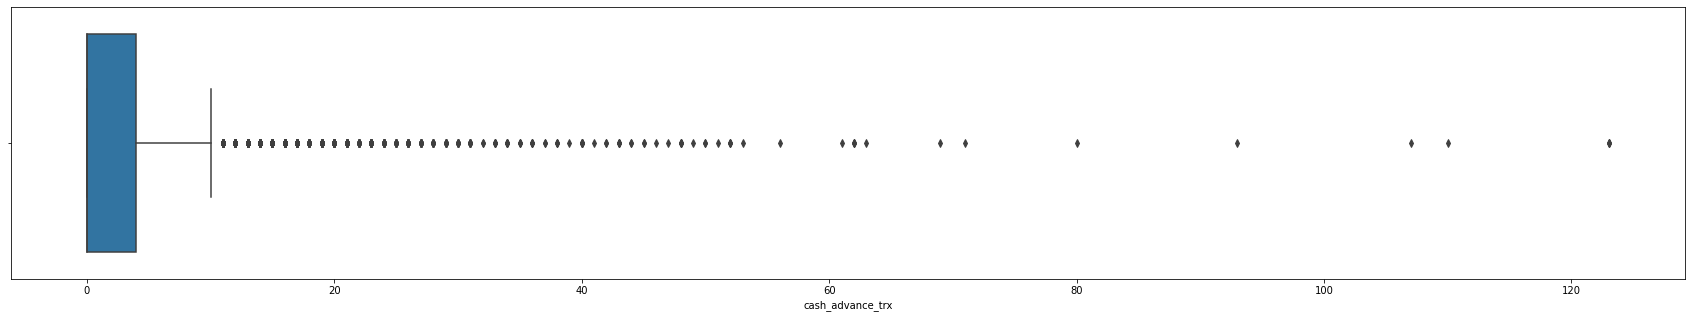

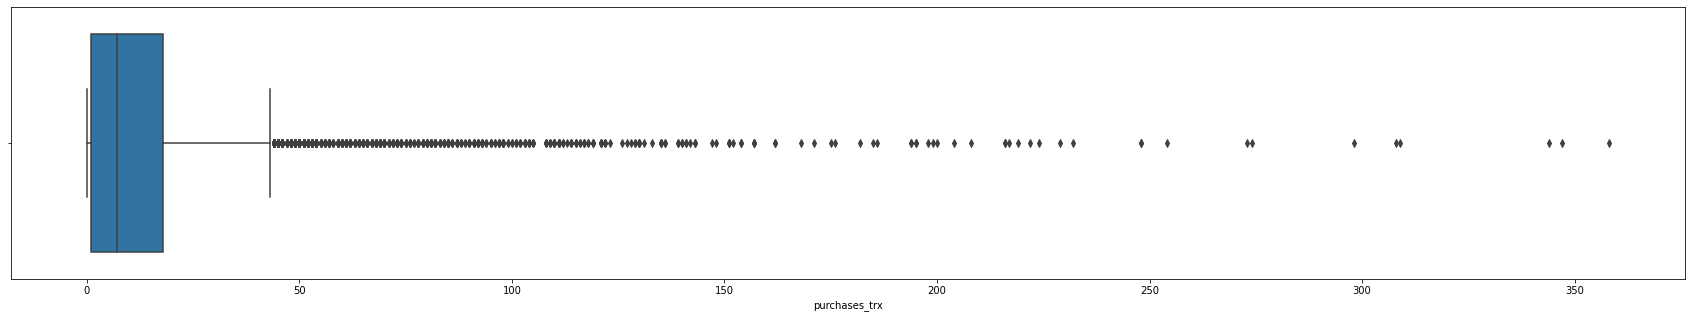

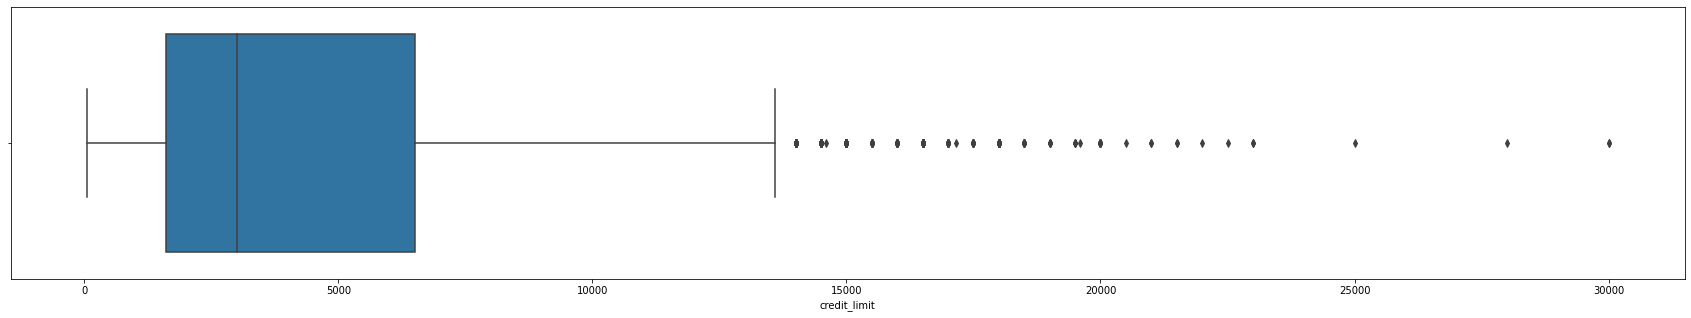

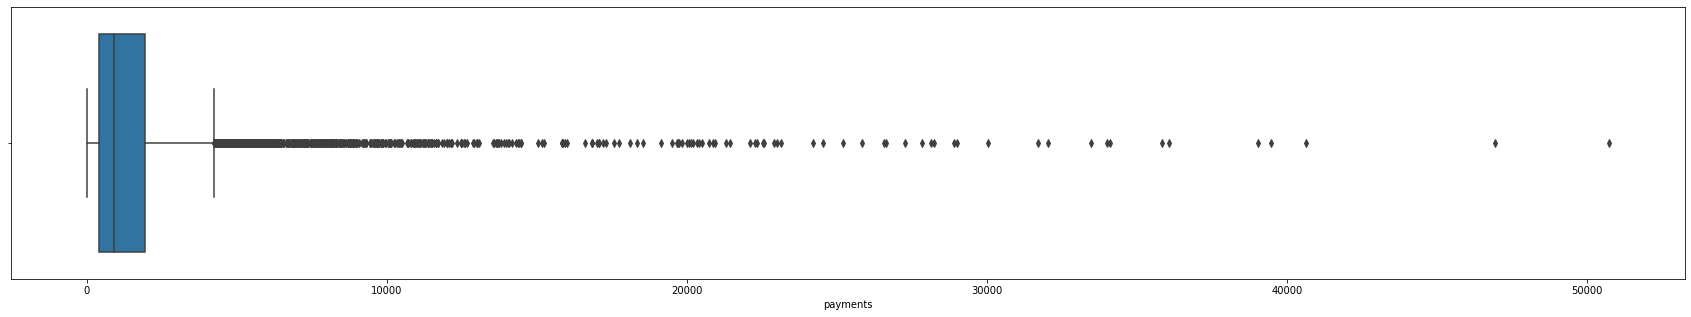

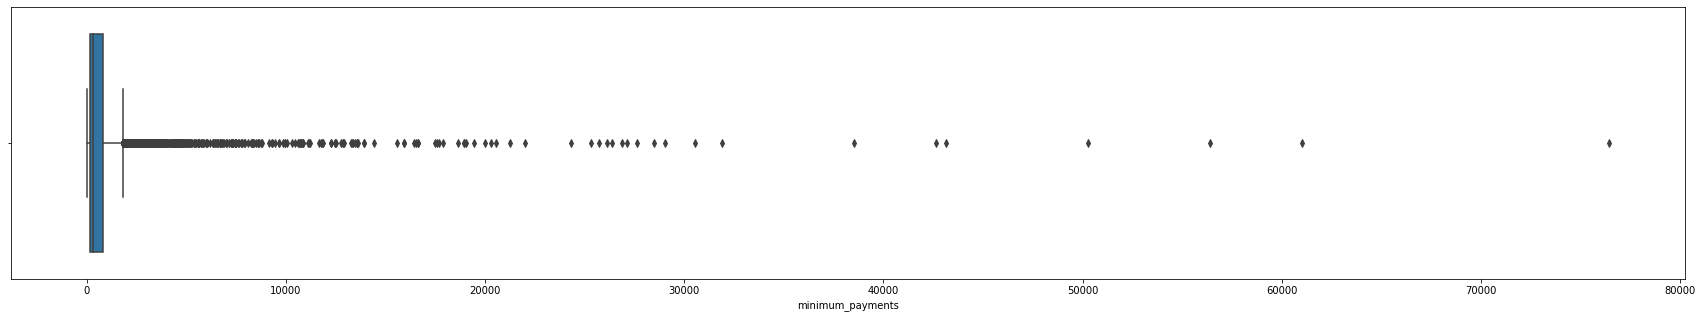

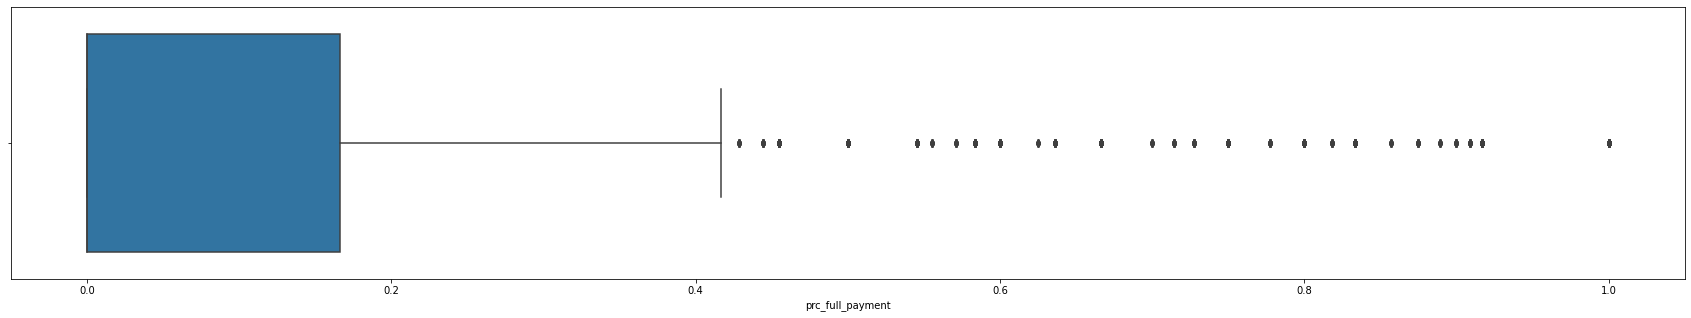

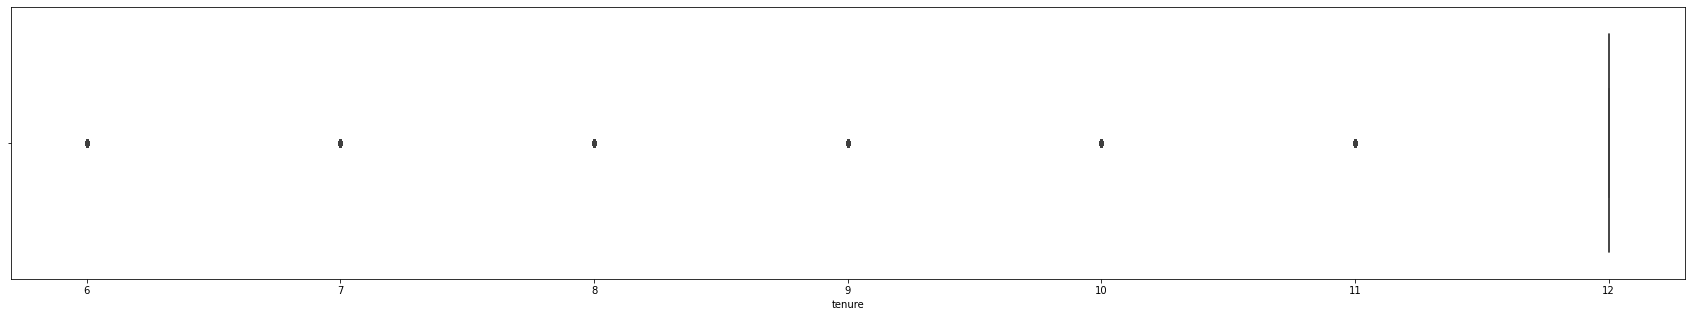

In [14]:
for column in data.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(data[column])
    plt.show()

* Burada çok fazla aykırı değer gözlemliyoruz, bu nedenle bu aykırı değerlerin silinmesi önerilmez. Aykırı değerlerin sayısı daha az olsaydı, aykırı noktaları silebilirdik. Burada aykırı değer kayıtlarını silmekten kaçınacağız. Burada sütun açıklamasına dayanarak yapabileceğimiz, verileri normalleştirmek ve çarpıklığı log dönüşümleri veya güç transformatörleri kullanarak ele almaktır.

* Burada gözlemlenmesi gereken bir şey daha var, minimum ödemeler sütunu da çok sayıda aykırı değer içeriyor, bu yüzden boş değerleri medyanla birlikte uygulayalım. 

<a id = "8"></a> <br>
### Pair Plot

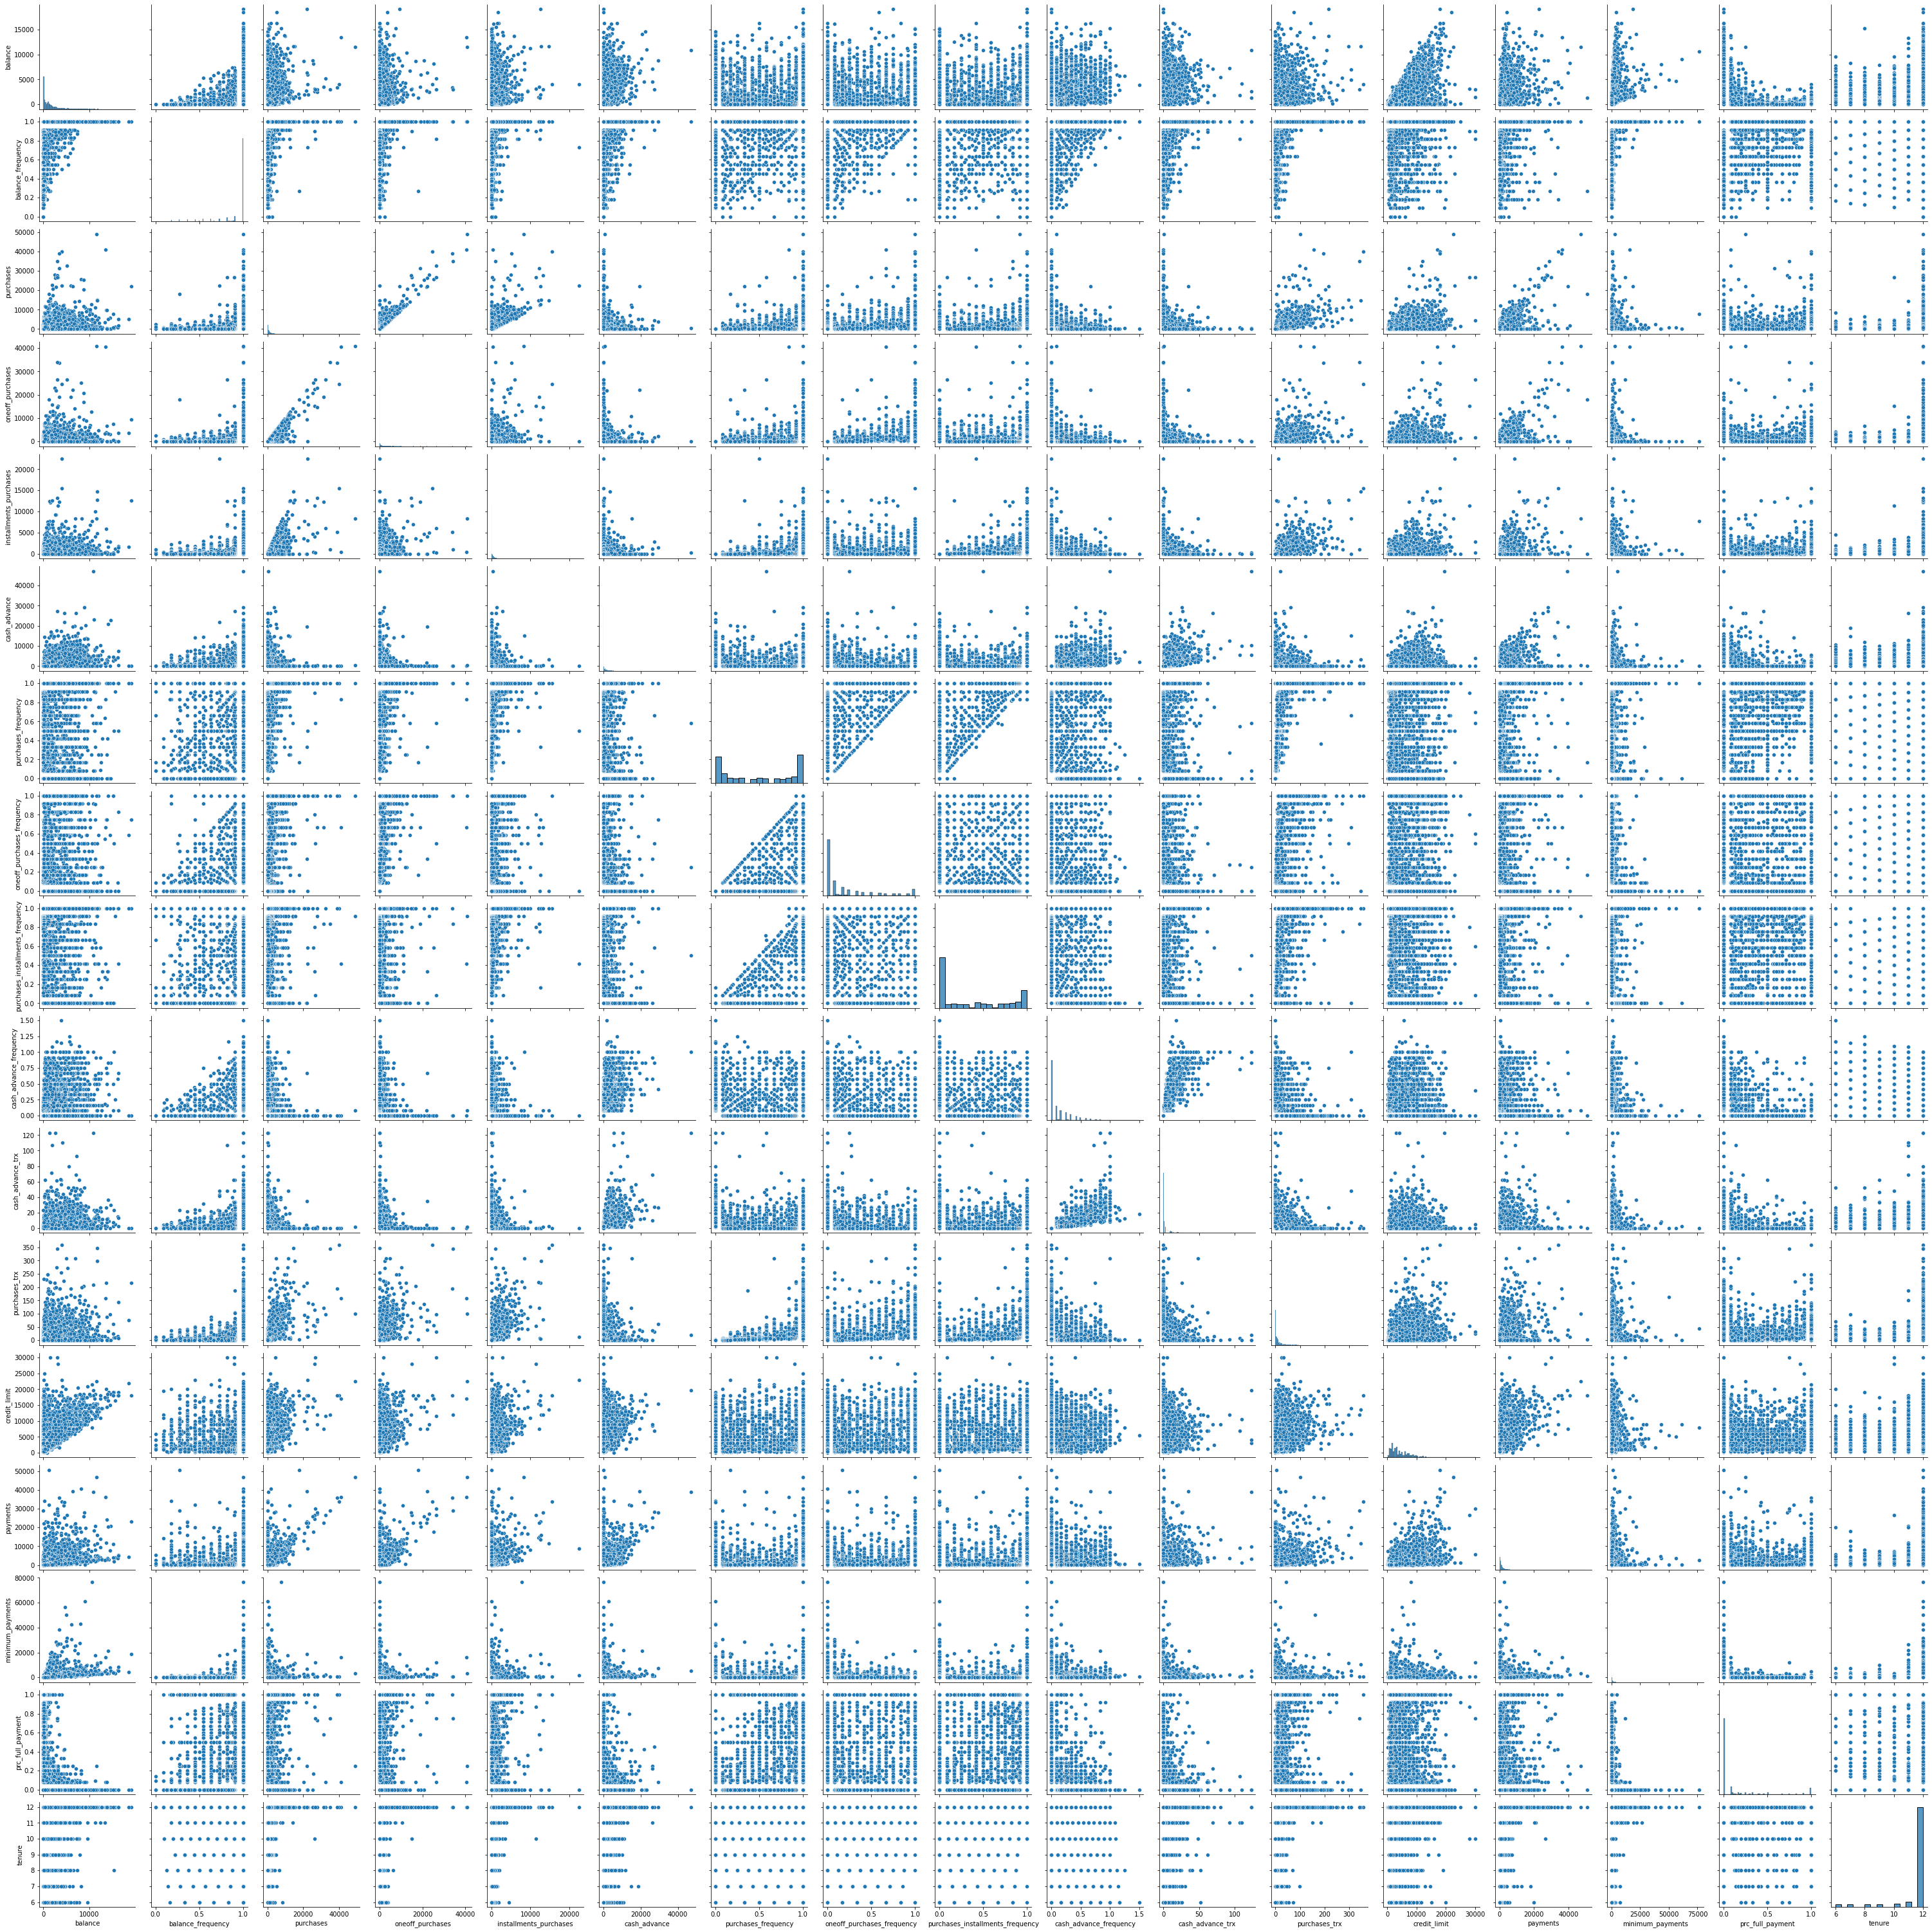

In [15]:
sns.pairplot(data)
plt.show()

### Burada aşağıdaki eğilimleri gözlemliyoruz:

1. Kredi limiti arttıkça bakiye de artar, dolayısıyla doğrusal bir ilişki vardır.
2. Alım sayısı arttıkça "peşin" işlem sayısı azalır
3. Kredi bakiyesi düşük olduğundan alış, tek seferlik ve taksitli alımlar daha azdır. Böylece tek değişkenli analizden varsayımımızı doğrulamak
4. Satın almalar, tek seferlik satın almalar ve taksitli satın almaların tümü doğrusal olarak ilişkilidir
5. Kredi bakiyesi düşük olduğu için "peşin nakit" işlemleri daha azdır.

<a id = "9"></a> <br>
### Count Plot

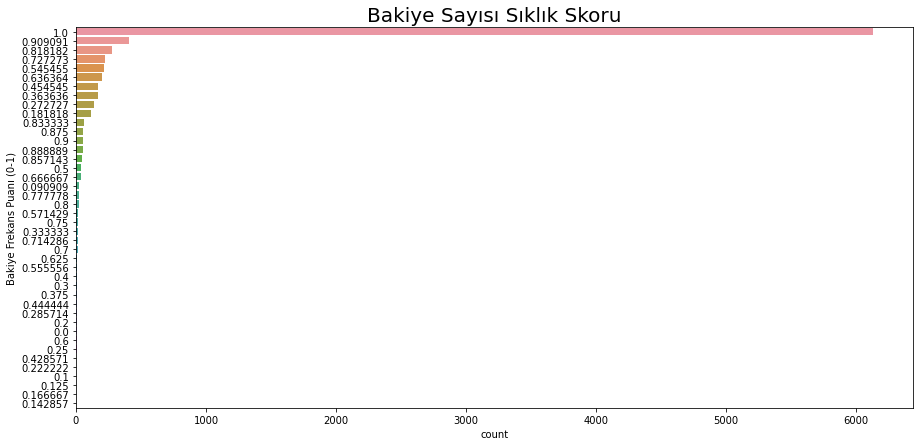

In [16]:
plt.rcParams['figure.figsize'] = (15,7)

sns.countplot(y=data['balance_frequency'],order = data['balance_frequency'].value_counts().index)
plt.ylabel('Bakiye Frekans Puanı (0-1)')
plt.title('Bakiye Sayısı Sıklık Skoru', fontsize=20)
plt.show()

* **Bakiye sıklığı, hesap bakiyelerinin ne sıklıkta güncellendiğine bağlı olarak hesaplara verilen 0-1 puandır. Biri en yüksek puan olmak. Yani temelde insanların kredi kartlarını ne sıklıkta kullandıklarının ölçüsüdür. Burada görebileceğimiz gibi, hesapların çoğu bir puana sahip, en iyi puan, yani çoğu insan kredi kartını sıklıkla kullanıyor ve sadece az sayıda insan kartlarını nispeten hareketsiz tutuyor.**

<a id = "10"></a> <br>
### Dist Plot

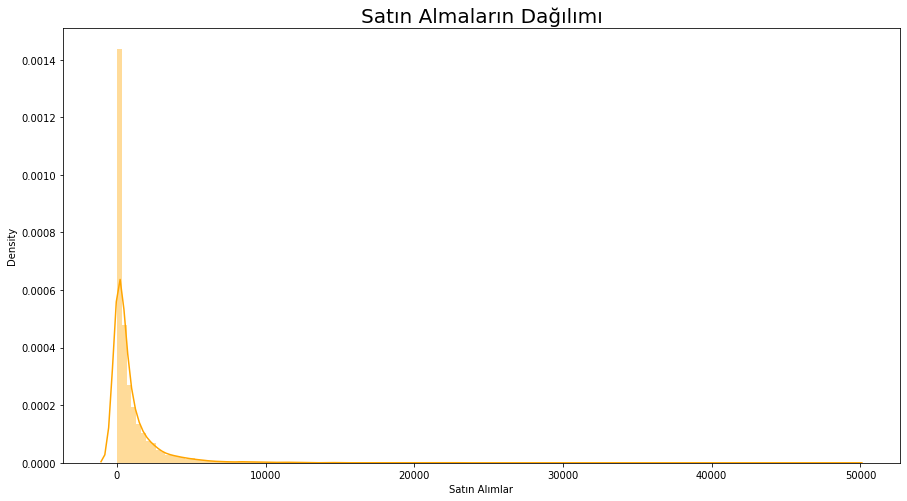

In [17]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(data['purchases'], color='orange', bins=150)
plt.title('Satın Almaların Dağılımı', size=20)
plt.xlabel('Satın Alımlar')
plt.show()

* **Burada satın almaların dağıtım grafiğine göre pek çok insanın satın alma miktarları 0'dır, bu daha önceden beri mantıklıdır, ayrıca birçok insanın sıfır bakiye kartı tuttuğunu da görüyoruz.**

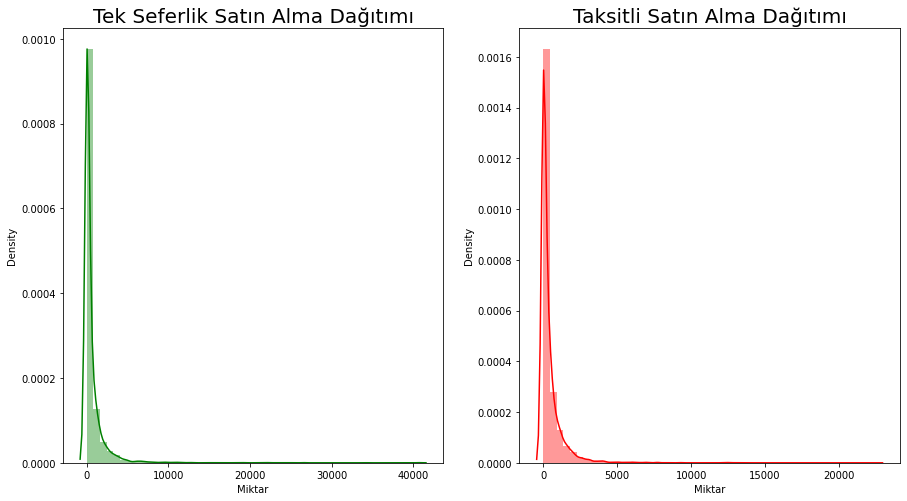

In [18]:
plt.subplot(1,2,1)
sns.distplot(data['oneoff_purchases'],color='green')
plt.title('Tek Seferlik Satın Alma Dağıtımı', fontsize = 20)
plt.xlabel('Miktar')


plt.subplot(1,2,2)
sns.distplot(data['installments_purchases'], color='red')
plt.title('Taksitli Satın Alma Dağıtımı', fontsize = 20)
plt.xlabel('Miktar')
plt.show()

* **Yukarıda tek seferlik alışverişlerin dağılımı ile taksitli alışverişlerin dağılımının karşılaştırması var.**

* **Bu hala aynı sıfır bakiye hesabı eğilimini takip ediyor. Tek seferlik alımlar 40.000 doların üzerine çıkarken, en yüksek taksitli alımlar 25.000 dolara kadar çıkıyor.**

<a id = "11"></a> <br>
### Sub Plot

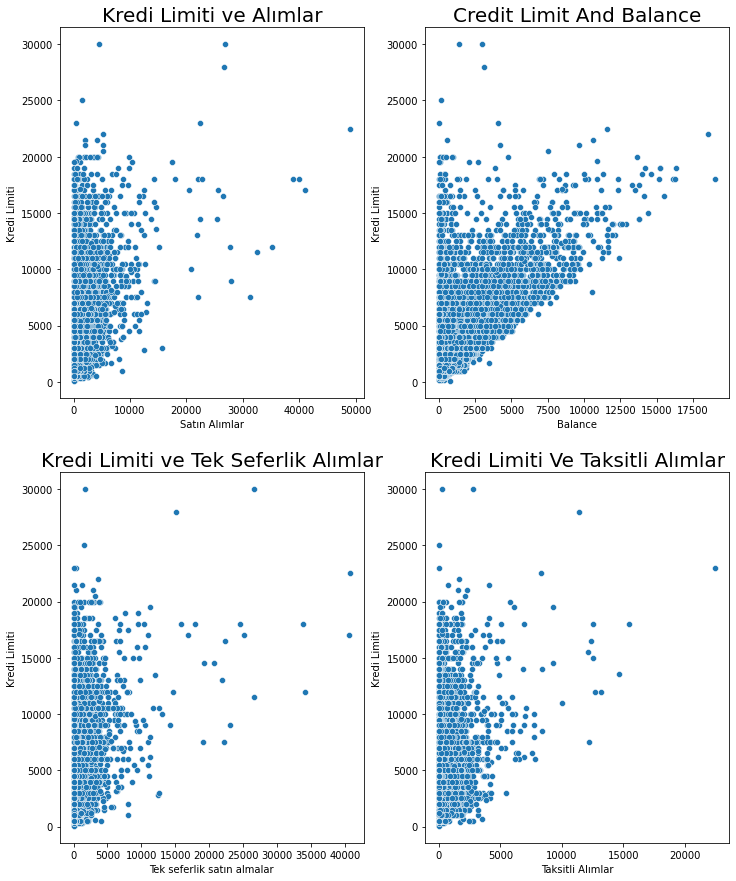

In [19]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(data['purchases'],data['credit_limit'])
plt.title('Kredi Limiti ve Alımlar', fontsize =20)
plt.xlabel('Satın Alımlar')
plt.ylabel('Kredi Limiti')

plt.subplot(2,2,2)
sns.scatterplot(data['balance'],data['credit_limit'])
plt.title('Credit Limit And Balance', fontsize =20)
plt.xlabel('Balance')
plt.ylabel('Kredi Limiti')

plt.subplot(2,2,3)
sns.scatterplot(data['oneoff_purchases'],data['credit_limit'])
plt.title('Kredi Limiti ve Tek Seferlik Alımlar', fontsize =20)
plt.xlabel('Tek seferlik satın almalar')
plt.ylabel('Kredi Limiti')

plt.subplot(2,2,4)
sns.scatterplot(data['installments_purchases'],data['credit_limit'])
plt.title('Kredi Limiti Ve Taksitli Alımlar', fontsize =20)
plt.xlabel('Taksitli Alımlar')
plt.ylabel('Kredi Limiti')

plt.show()

### Yukarıda kredi limiti ile bakiye ve farklı satın alma türleri arasındaki dağılım grafiği verilmiştir.

* **Farklı satın alma türleri ile başlayarak. Bunlar ilginç dağılım grafikleridir, çünkü sezgisel olarak, kredi limiti arttığında satın almaların artmasını bekleriz. Sonuçta, kullanmayı düşünmüyorsanız neden yüksek limitli bir kredi kartı alıyorsunuz ama grafikler farklı bir hikaye gösteriyor.**

* **Kredi limiti ile bu değişkenler arasında güçlü bir ilişki olmadığı görülmektedir. Aslında, kredi limiti artarken satın alma tutarı sıfırda kalma eğilimindedir. Bu da kredi kartı kullanıcılarının kredilerini kullanmak için gerçekten bakiyelerini düşük tutmak istediklerini gösteriyor. Bu, çoğu insan için kredi kartlarının harcama aracından ziyade kredi kullanımı için araçlar olduğu anlamına gelebilir.**

* **Bakiye ile ilgili olarak, kredi limiti arttıkça bakiyenin de arttığı daha iyi bir korelasyon var gibi görünüyor, ancak bakiyenin sıfırda kaldığı ancak kredi limitlerinin yükseldiği noktalar da olduğu görülüyor.**

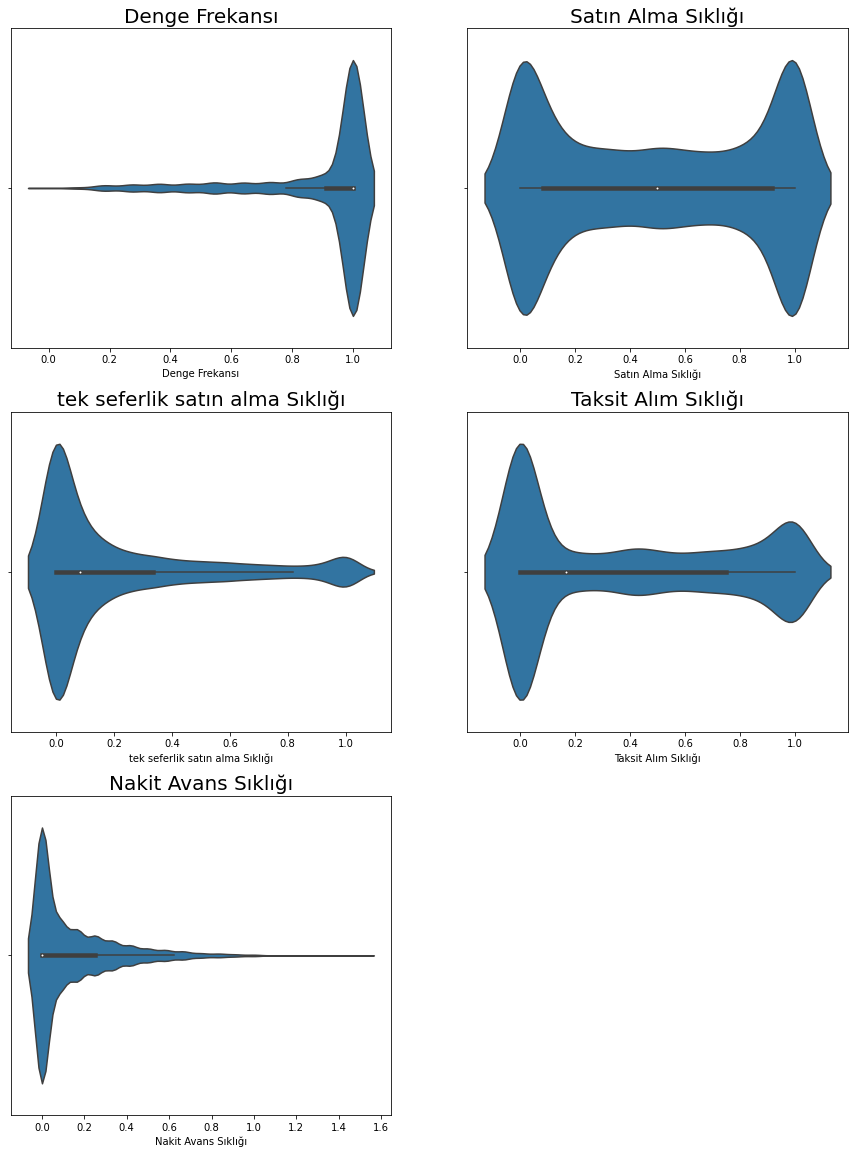

In [20]:
plt.rcParams['figure.figsize'] = (15,20)

plt.subplot(3,2,1)
sns.violinplot(data['balance_frequency'])
plt.title('Denge Frekansı', fontsize =20)
plt.xlabel('Denge Frekansı')

plt.subplot(3,2,2)
sns.violinplot(data['purchases_frequency'])
plt.title('Satın Alma Sıklığı', fontsize =20)
plt.xlabel('Satın Alma Sıklığı')

plt.subplot(3,2,3)
sns.violinplot(data['oneoff_purchases_frequency'])
plt.title('tek seferlik satın alma Sıklığı', fontsize =20)
plt.xlabel('tek seferlik satın alma Sıklığı')

plt.subplot(3,2,4)
sns.violinplot(data['purchases_installments_frequency'])
plt.title('Taksit Alım Sıklığı', fontsize =20)
plt.xlabel('Taksit Alım Sıklığı')

plt.subplot(3,2,5)
sns.violinplot(data['cash_advance_frequency'])
plt.title('Nakit Avans Sıklığı', fontsize =20)
plt.xlabel('Nakit Avans Sıklığı')

plt.show()

* **Bu veri seti, 0 en düşük puan ve 1 en yüksek puan olmak üzere her bir veri noktası için her bir değişkenin sıklığını kullanmayı söyleyen çeşitli sıklık puanları (0-1) içerir. Bunları bir araya getirip analiz etmenin ilginç olacağını düşünüyorum.** 


* **Denge frekansından başlayarak. Bu, insanların bakiyelerini ne sıklıkta güncellediklerinin ölçümüdür. Gördüğümüz gibi, çok fazla sayıda insan, aslında, insanların bakiyelerini sık sık güncelledikleri anlamına gelen tek bir puan alıyor. Daha önce gördüğümüz gibi, kredi kartı sahiplerinin kredi kullanımı için bakiyelerini düşük tutma eğilimi vardır. Pek çok kişinin bu kadar yüksek puan alması, bu kişilerin düşük tutmak veya hatta sıfır bakiyeye sahip olmak için genellikle bakiyelerini ödemelerinden kaynaklanıyor olabilir.**

* **Daha sonra satın alma sıklığımız veya insanların ne sıklıkla alışveriş yaptıkları var. Düşük ve yüksek puan alan aynı sayıda insan var gibi görünüyor. Bu bize, kredi kartlarıyla sık sık alışveriş yapanların eşit sayıda ve nadiren yapanların sayısının eşit olduğunu gösteriyor. Bu ilginç bir bulgu, çünkü dağılım dengesine daha önce baktığımızda, dengesi yüksek kişilere kıyasla sıfır ve düşük bakiyeli çok daha fazla insan olduğunu görebiliyoruz. Sezgisel olarak, sık satın alan ve yapmayanların sayısı eşitse, bakiye dağılımının da hem düşük hem de yüksek olmasını bekleriz. Sonra tekrar, yüksek bakiye frekansı nedeniyle, insanların kredi kartlarını ödemekte gerçekten iyi olduklarını daha önce gördük.**

* **Tek seferlik satın alma sıklığı ile taksitli satın alma sıklığı arasında karşılaştırma yapıldığında, çoğu kişinin sıfır puan civarında olduğunu görebiliriz, bu da insanların nadiren satın aldığı anlamına gelir. Yapan kişilere baktığımızda, taksit sıklığı puanı tek seferlik alışverişe göre daha yüksek olan kişilerin daha fazla olduğunu görebiliriz. Bu, insanların taksitli satın almayı bir kereye mahsus olanlardan daha sık kullanmayı tercih ettiğini gösterir.**

* **Son olarak nakit avans sıklığımız var. Bu, insanların ne sıklıkla nakit avans aldıklarını ve çoğu insanın sıfır civarında puan aldığını gördüğümüz gibi, sık sık nakit avans almadıkları anlamına gelir.**

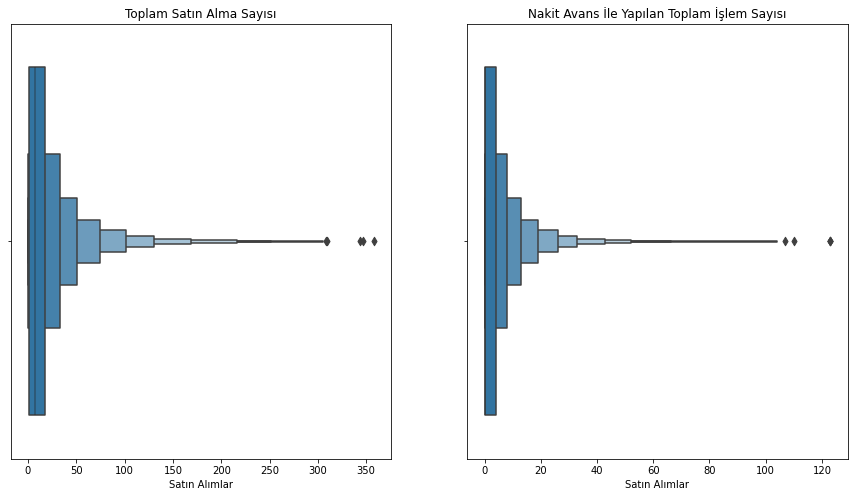

In [21]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(data['purchases_trx'])
plt.title('Toplam Satın Alma Sayısı')
plt.xlabel('Satın Alımlar')

plt.subplot(1,2,2)
sns.boxenplot(data['cash_advance_trx'])
plt.title('Nakit Avans İle Yapılan Toplam İşlem Sayısı')
plt.xlabel('Satın Alımlar')

plt.show()

* **Yukarıda, toplam satın alma sayısının ve peşin ödeme ile yapılanların kutulu parselleri bulunmaktadır.**

* **Şimdiye kadar beklediğimiz gibi, kredi kartını satın almak için değil, kredi taksitlendirmesi için kullandıkları varsayımı altında olduğumuz için, işlem sayısı az olan çok sayıda insan var. Ve yüksek miktarda satın alan sadece birkaç kişi var. Birkaç kişi 300'den fazla satın alır ve daha azı nakit avans ile 100'den fazla satın alır.**

<a id = "12"></a> <br>
### Heat Map

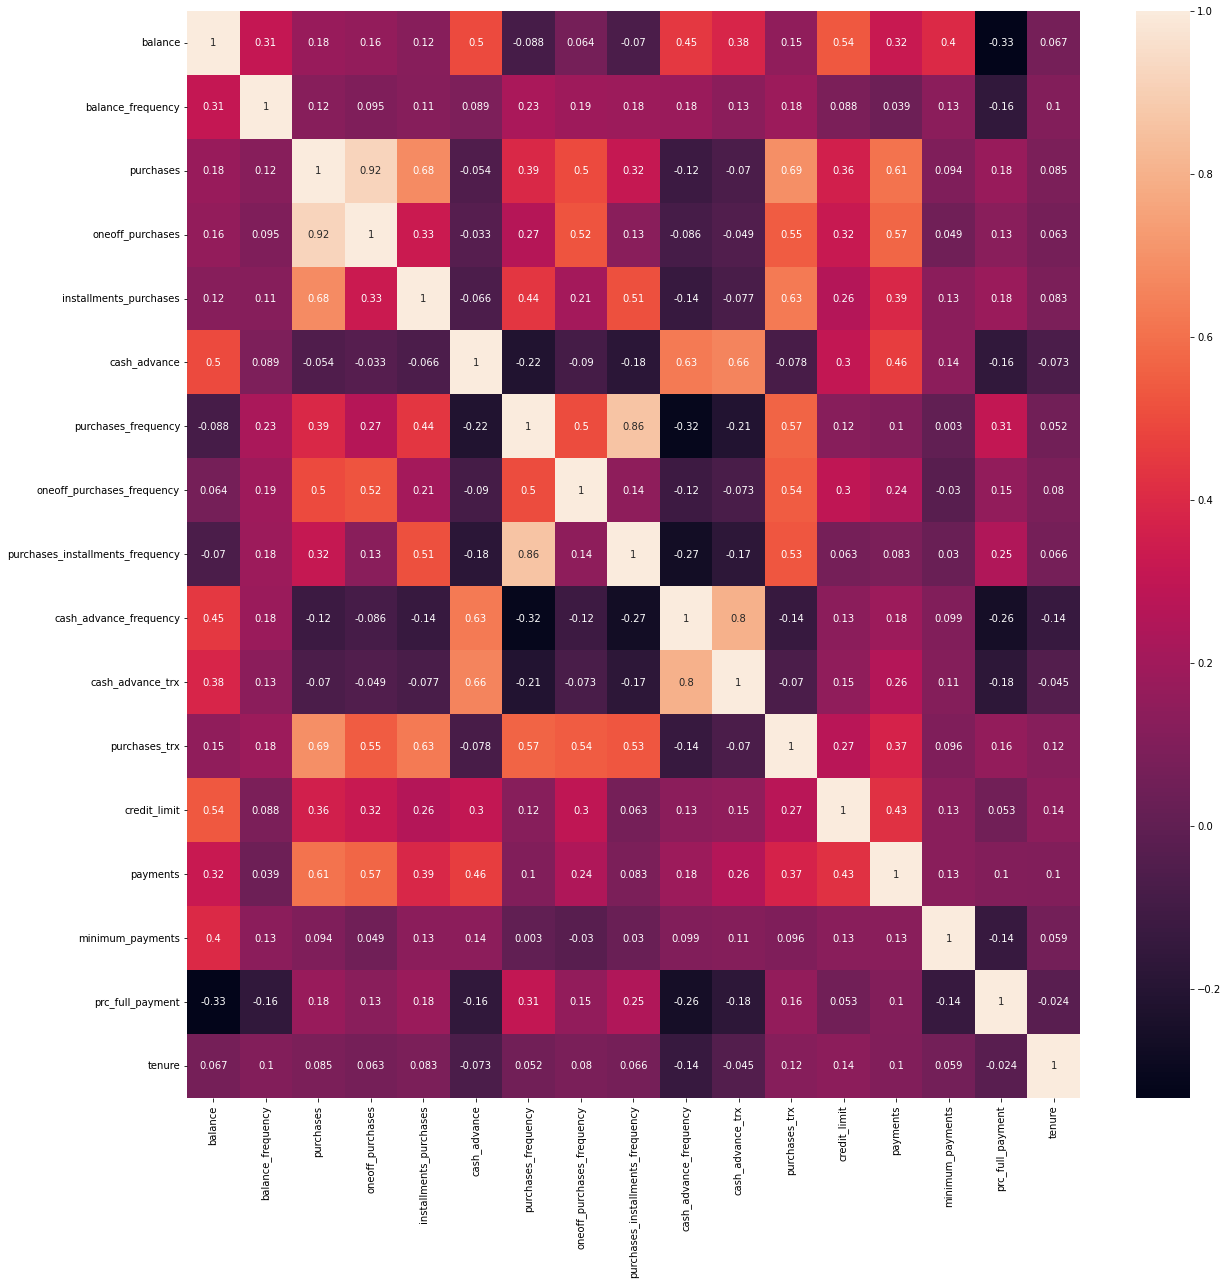

In [22]:
plt.figure(figsize=(20,20))
corr_data = data.corr()
sns.heatmap(corr_data,annot=True)
plt.show()

1. **Alımlar, tek seferlik alımlar ve yatırım alımları yüksek oranda ilişkilidir. Yani satın almaların çoğu tek seferlik satın almalar**
2. **Bakiye yüksek olduğunda insanlar tam ödeme yapmazlar.**
3. **Satın alma sıklığı ve nakit avans sıklığı ters orantılıdır. Yani satın alma sıklığı yüksek olduğu için peşin ödeme sayısı daha azdır ve bunun tersi de geçerlidir.**

<a id = "13"></a> <br>
## Data Preparation

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape

(8636, 17)

* **Burada, verilerimiz sola çarpık olma eğiliminde olduğundan ve sağda yalnızca birkaç veri noktası olduğundan ve StandScaler aykırı değerleri daha iyi işleyebildiğinden, MinMaxscaler'ı değil, StandardScaler'ı kullandım**

In [24]:
hier_cluster = linkage(data_scaled, method='ward')

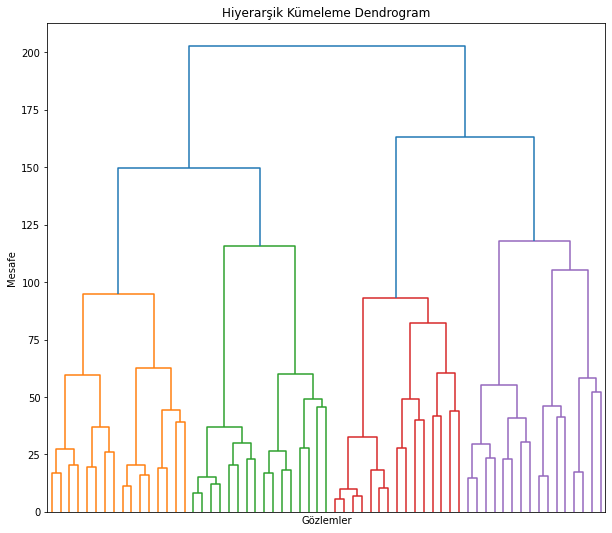

In [25]:
plt.figure(figsize=(10,9))
plt.title('Hiyerarşik Kümeleme Dendrogram')
plt.xlabel('Gözlemler')
plt.ylabel('Mesafe')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

* **Dendrogramımızdaki en kolay gözlem, yaklaşık 4 klozunun olmasıdır. 125 yüksekliğin üzerinde yatay bir çizgi çizersek verilerimiz üzerinde 4 genel kümemiz olur.**

<a id = "14"></a> <br>
## K-Means Clustering 

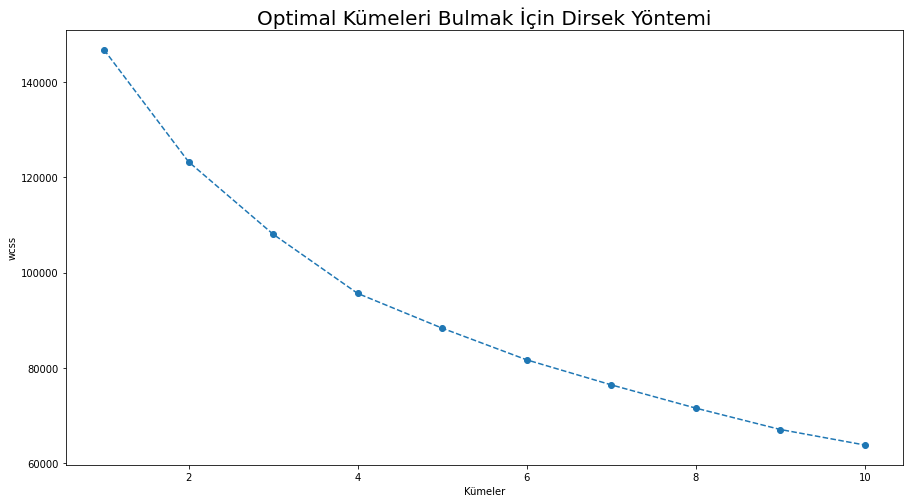

In [26]:
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(data_scaled)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Optimal Kümeleri Bulmak İçin Dirsek Yöntemi', fontsize =20)
plt.xlabel('Kümeler')
plt.ylabel('wcss')

plt.show()

* **İşte kmean analizini kullanarak optimum sayı kümelerini bulmak için kullanılan dirsek yöntemini gösteren grafik**

** **1-10 arasında farklı sayıda küme denedik ve ardından küme numarasına karşı atalet veya wcss (kümeler toplamı karesi içinde) grafiğini çizdik. Atalet, temel olarak kümelerdeki veri noktalarının merkezlere ne kadar yakın olduğudur; bu, ne kadar düşük olursa, noktaların kendi kümelerine o kadar uygun olduğu anlamına gelir. Burada küme sayısını olabildiğince düşük tutarken wcss'nin olabildiğince düşük olduğu yeri bulmaya çalışıyoruz. Burada optimum küme sayısı 4 kümedir çünkü grafiğin düzleşmeye başladığı yer burasıdır, yani daha fazla kümeye sahip olmak çok daha uygun bir makine vermeyecektir.**

In [27]:
# modeli 4 küme olarak ayarlayıp o şekilde tekrardan algoritmayı uyguluyoruz
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
label = km.fit_predict(data_scaled)

data['label'] = label

In [28]:
data['constant'] = 'constant'

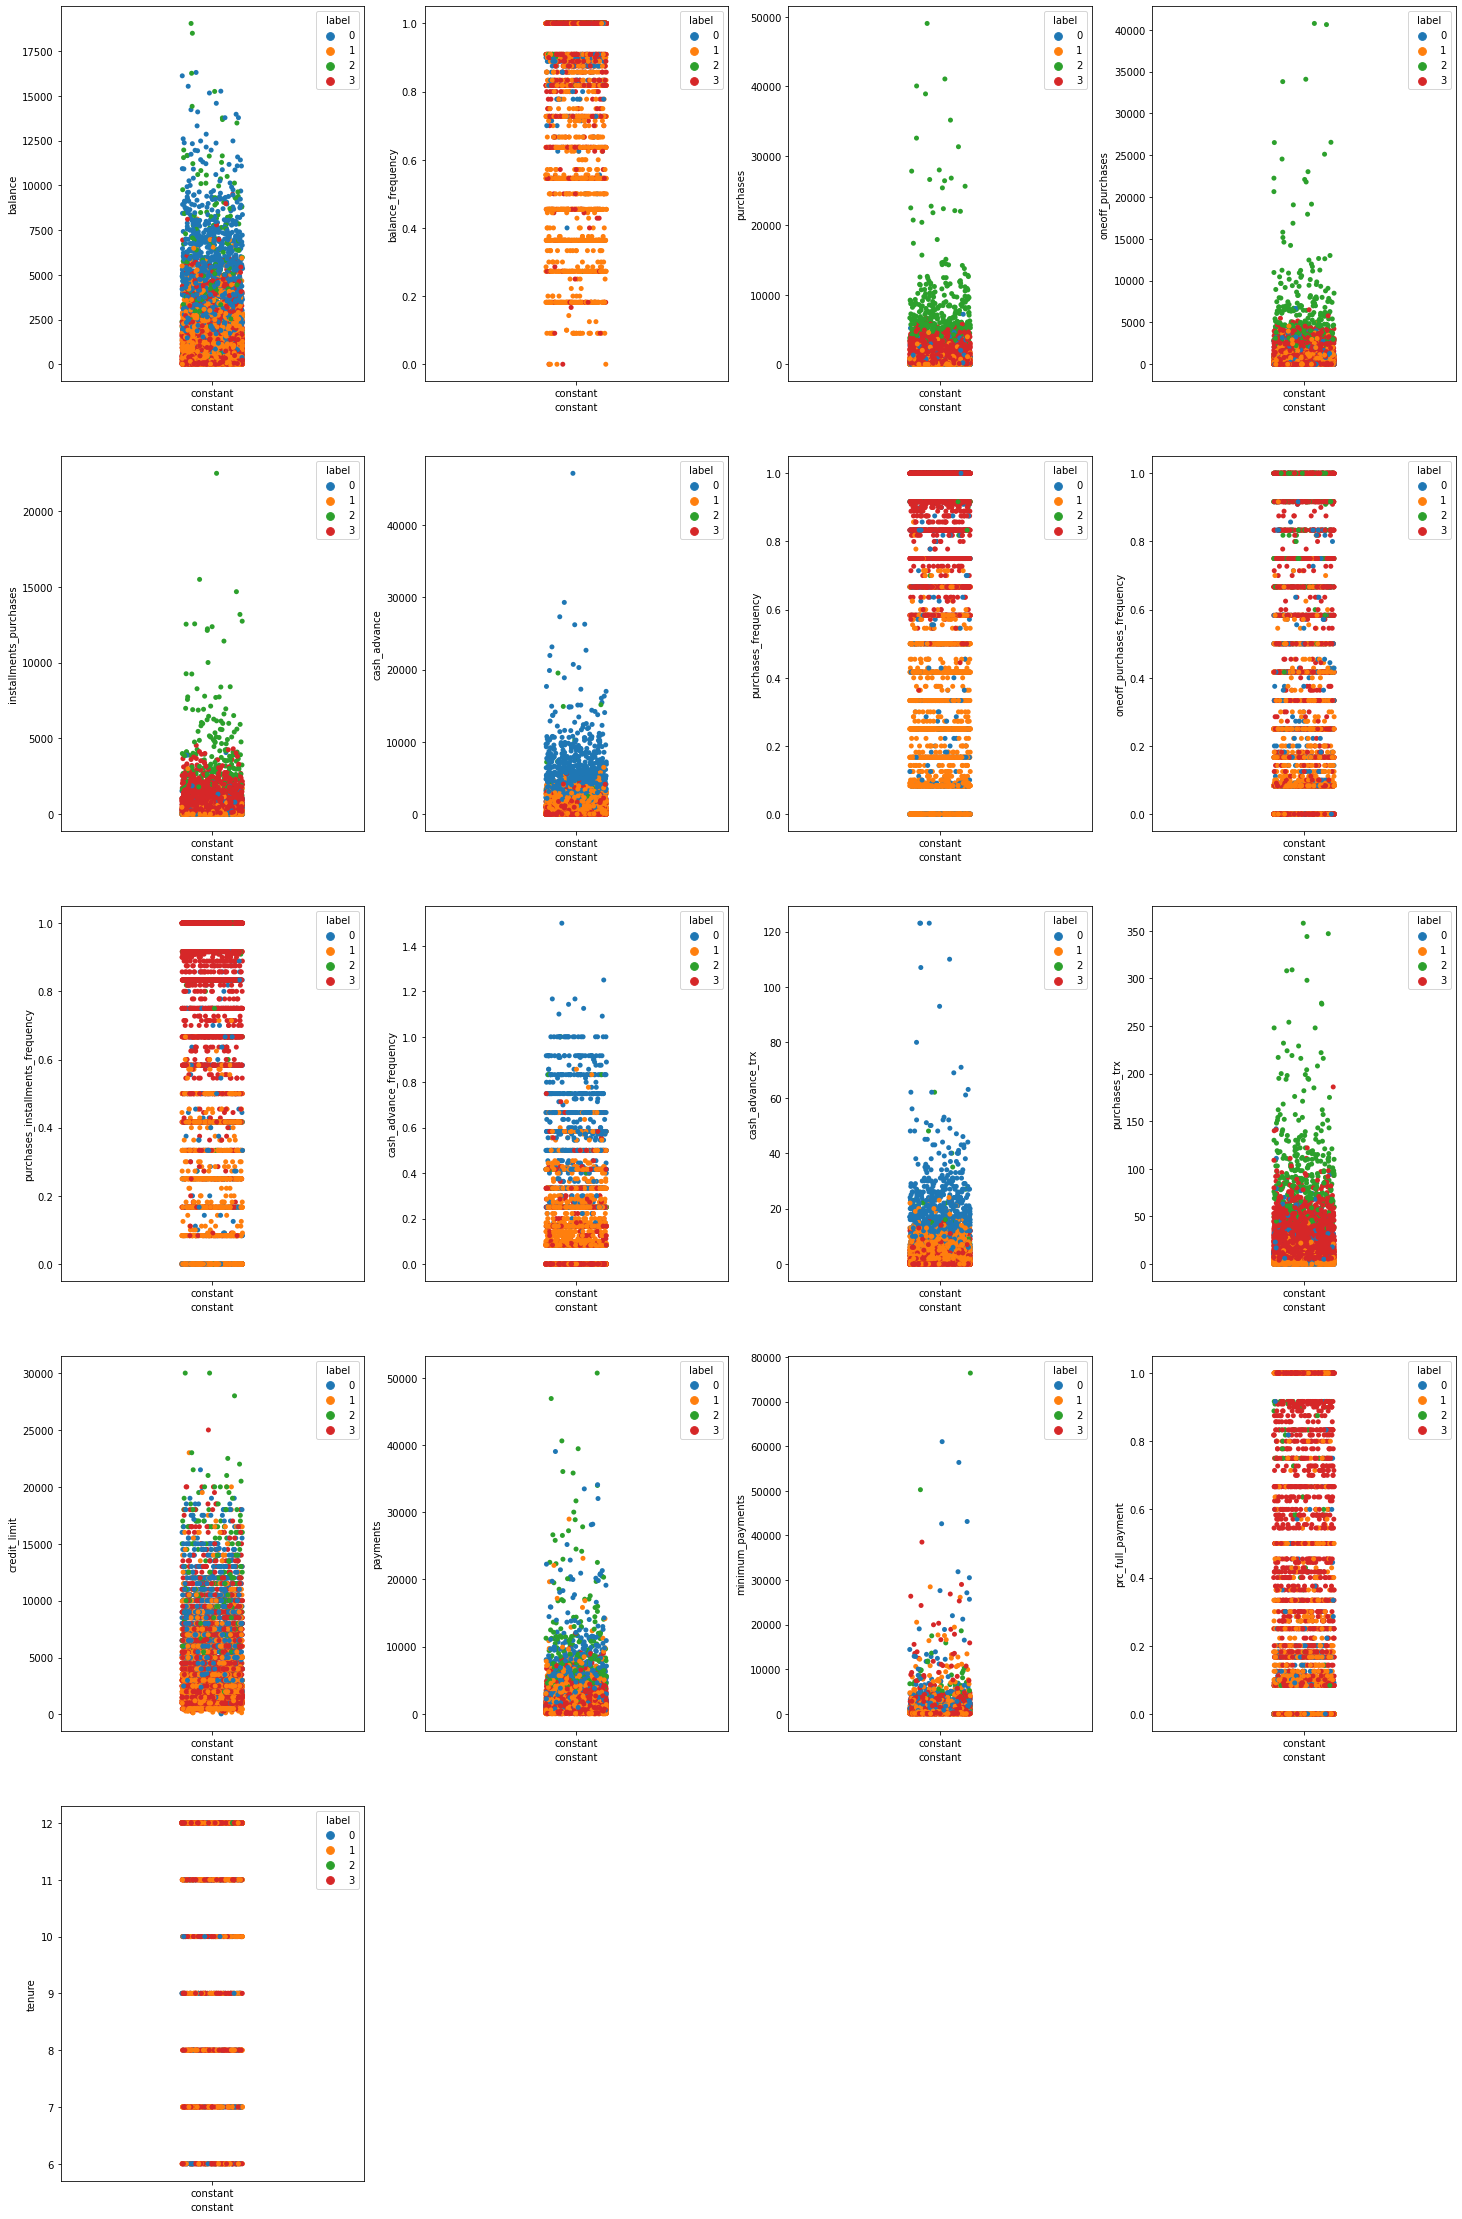

In [29]:
plt.rcParams['figure.figsize'] =(25,40)

for num in range(0,17):
    ax = plt.subplot(5,4,num+1)
    col = data.columns[num]
    sns.stripplot(data['constant'],data[col], ax=ax, hue=data['label'])
    plt.xlabel('constant')

plt.show()

### Şerit Plotlar üzerinden görseller yer almakta;

* **Hızlı bir bakışta, 4 kümenin kredi kartı kullanıcılarını, satın alımlarının ve bakiyelerinin ne kadar yüksek olduğuna bağlı olarak gruplara ayırdığı açıktır. Birkaç örnek verelim ve onlara daha yakından bakalım.**

* **Örneğin dengeye bakıldığında insanlar 4 gruba ayrılmaktadır. Küme 0 en yüksek dengeye sahiptir, ardından küme 1 gelir ve ardından altta karışık küme 2,3 vardır. Aynı şey satın almalar için de geçerli. Küme 0, sırayla küme 1, 2, 3 tarafından en yüksek satın alma takibine sahiptir.**

* **Küme 0 = En yüksek harcama yapan, küme 1 = Orta harcama yapan, küme 2 =Düşük harcama yapan, küme 3 =Sıfır bakiye ve düşük harcama yapan**

<a id = "15"></a> <br>
## PCA

In [30]:
pca = PCA(n_components = 7)  
pca.fit(data_scaled)

PCA(n_components=7)

In [31]:
data_scaled.shape

(8636, 17)

In [32]:
# x datasını 2 boyuta döüştürüyorum
x_pca = pca.transform(data_scaled)
x_pca.shape

(8636, 7)

In [33]:
#gerçek datayı ne kadar temsil ettiğine bakıyoruz
print("variance ratio: ", pca.explained_variance_ratio_)

variance ratio:  [0.27231177 0.20374308 0.08918334 0.07573609 0.06276618 0.05712786
 0.04916188]


In [34]:
#datamın ne kadaraını kaybettiğimizi öğreniyoruz 
print("sum: ",sum(pca.explained_variance_ratio_))

sum:  0.8100301906450043


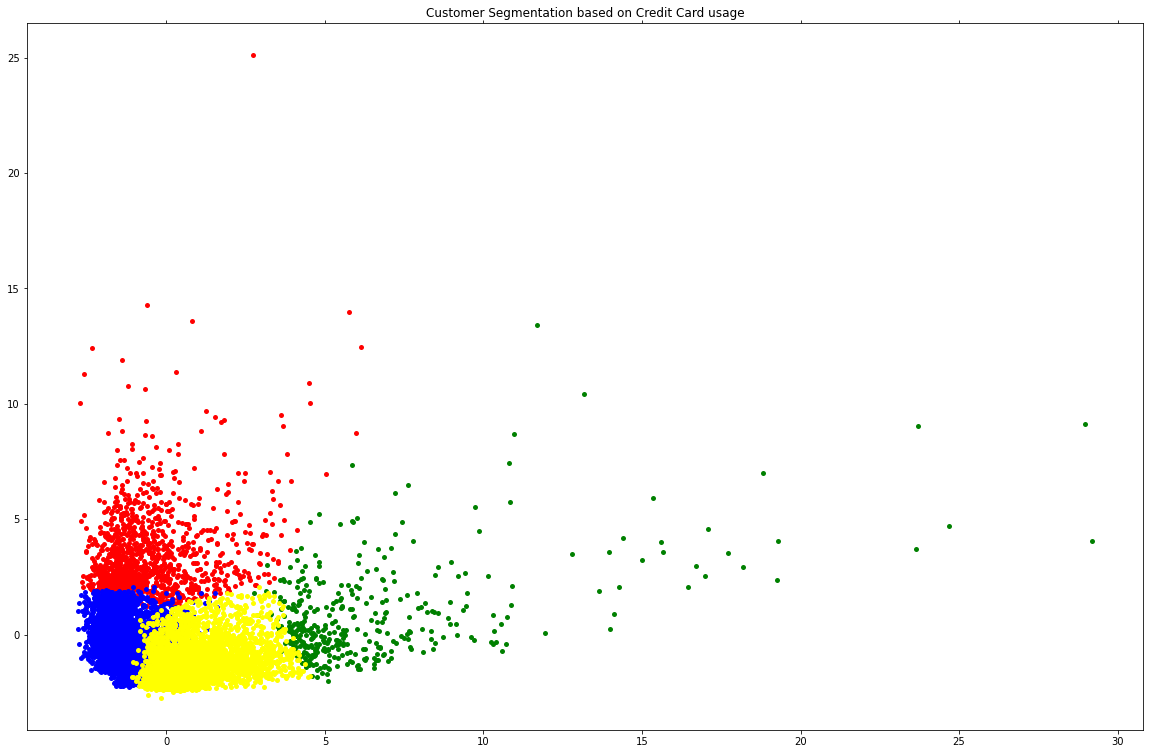

In [35]:
#data["p1"] = x_pca[:,0]
#data["p2"] = x_pca[:,1]

x = x_pca[:,0]
y = x_pca[:,1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow'}
  
data = pd.DataFrame({'x': x, 'y':y, 'label':data['label']}) 
groups = data.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("Customer Segmentation based on Credit Card usage")
plt.show()

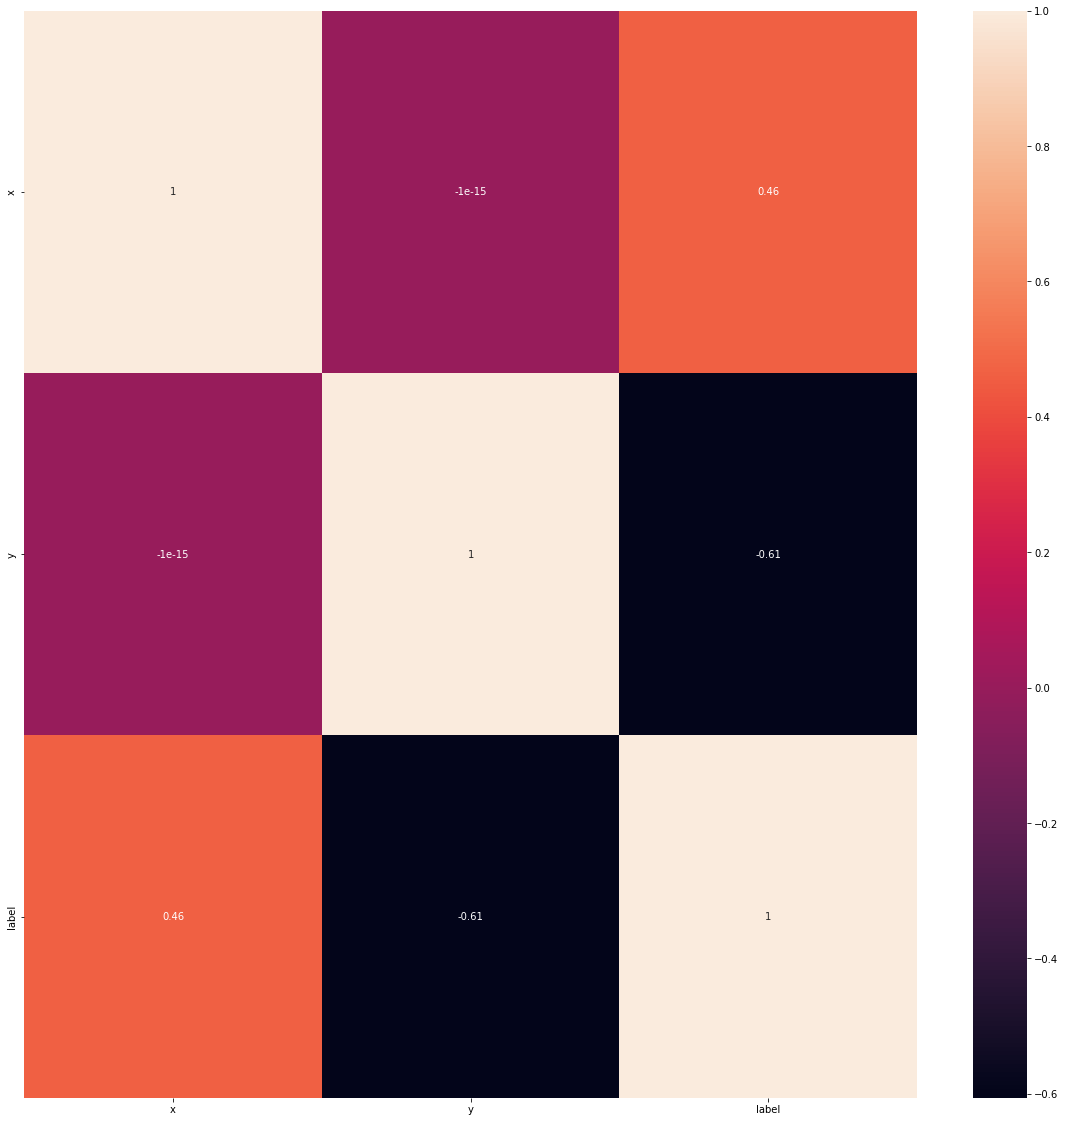

In [36]:
plt.figure(figsize=(20,20))
corr_pca = data.corr()
sns.heatmap(corr_pca,annot=True)
plt.show()